# Import Libraries and Data Set

### Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("C:/Users/HP/Downloads/Salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()
# All the rows have data and contain no NaN values, and have correct datatypes hence no need to go ahead with EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Check Correlation

In [4]:
data.corr()
# Correlation is more than 0.8.
# Higher correlation suggests Linear regression may provide better predictions

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

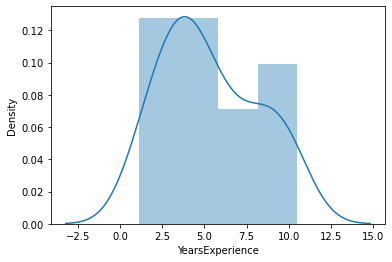

In [5]:
# Plot both columns
sns.distplot(data['YearsExperience'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

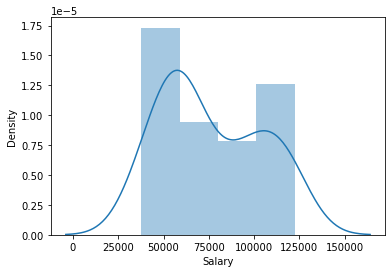

In [6]:
sns.distplot(data['Salary'])
# Both distplots show that values are fairly normally distributed

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

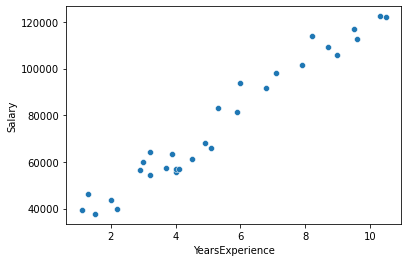

In [7]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])


# Fitting a Linear Regression Model

### 1. for y~x

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data = data).fit()

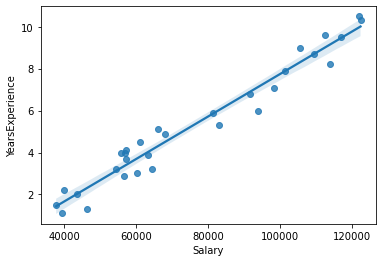

In [9]:
sns.regplot(x="Salary", y="YearsExperience", data=data);

In [10]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues)   

# pvalues for both intercept and y are less than 0.05

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

#### Predict for original dataset

In [13]:
#Predict for the given dataset values of original dataset


In [14]:
model.predict(data)
# Predictions for input data

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

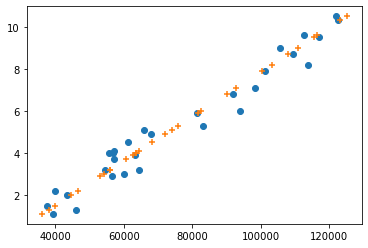

In [15]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='+')
plt.show()

### 2. for y~np.log(x)

In [16]:
y = data.Salary
x = data.YearsExperience


In [17]:
model = smf.ols('y~np.log(x)',data = data).fit()

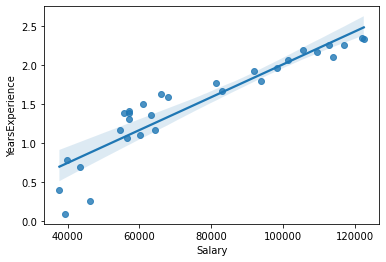

In [18]:
sns.regplot(x=y, y=np.log(x), data=data);

In [19]:
#Coefficients
model.params

Intercept    14927.97177
np.log(x)    40581.98796
dtype: float64

In [20]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept is higher and for y-intercept is less than 0.05

Intercept     2.895135
np.log(x)    12.791989
dtype: float64 
 Intercept    7.268813e-03
np.log(x)    3.250155e-13
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)
# rsquare values are better than y~x

(0.8538888828756969, 0.8486706286926861)

#### Predict for original dataset

In [22]:
#Predict for the given dataset values of original dataset


In [23]:
model.predict(data)
# Predictions for input data

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

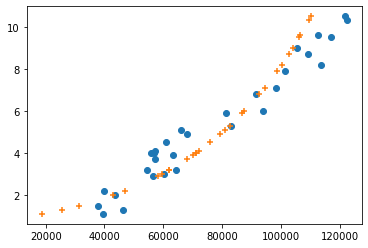

In [26]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='+')
plt.show()

### 3. for np.log(y)~x

In [27]:
y = data.Salary
x = data.YearsExperience


In [28]:
model = smf.ols('np.log(y)~x',data = data).fit()

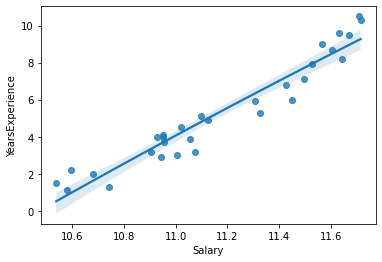

In [29]:
sns.regplot(x=np.log(y), y=x, data=data,logx=True);

In [30]:
#Coefficients
model.params

Intercept    10.507402
x             0.125453
dtype: float64

In [31]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    273.327166
x             19.584833
dtype: float64 
 Intercept    1.604634e-49
x            7.027439e-18
dtype: float64


In [32]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9319671194084195, 0.9295373736730059)

#### Predict for original dataset

In [33]:
#Predict for the given dataset values of original dataset


In [34]:
np.exp(model.predict(data))
# Predictions for input data = These predictions are way off the original data

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

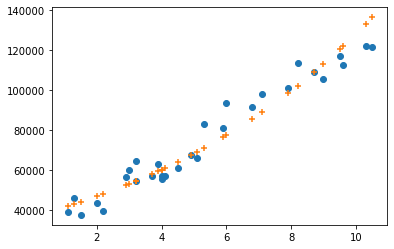

In [35]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.YearsExperience,(data.Salary))
plt.scatter(data.YearsExperience,np.exp(model.predict(data)),marker='+')
plt.show()

### 4. for np.log(y)~np.log(x)

In [36]:
y = data.Salary
x = data.YearsExperience


In [37]:
model = smf.ols('np.log(y)~np.log(x)',data = data).fit()

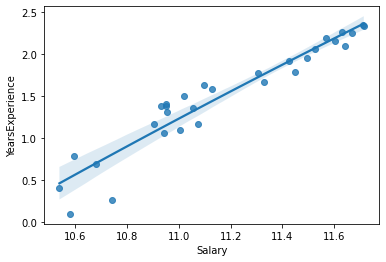

In [38]:
sns.regplot(x=np.log(y), y=np.log(x), data=data,logx=True);

In [39]:
#Coefficients
model.params

Intercept    10.328043
np.log(x)     0.562089
dtype: float64

In [40]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    184.867959
np.log(x)     16.352542
dtype: float64 
 Intercept    9.073132e-45
np.log(x)    7.395278e-16
dtype: float64


In [41]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

#### Predict for original dataset

In [42]:
#Predict for the given dataset values of original dataset


In [43]:
np.exp(model.predict(data))
# Predictions for input data = output very far from original data

0      32261.052293
1      35437.122429
2      38405.293942
3      45145.842502
4      47630.388981
5      55631.518478
6      56701.779991
7      58796.479782
8      58796.479782
9      63795.788170
10     65711.741723
11     66653.561692
12     66653.561692
13     67585.125762
14     71215.679585
15     74707.408671
16     76406.350778
17     78076.357099
18     82927.671492
19     83714.809188
20     89816.499870
21     92022.700793
22     97714.345570
23     99783.038699
24    103158.601018
25    105143.207648
26    108387.620951
27    109027.449995
28    113427.055251
29    114659.822462
dtype: float64

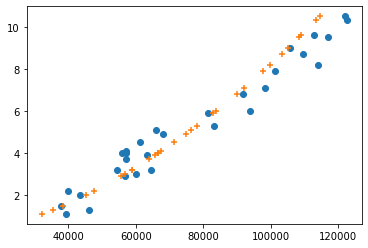

In [45]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.exp(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 5. for y~np.square(x)

In [46]:
y = data.Salary
x = data.YearsExperience


In [47]:
model = smf.ols('y~np.square(x)',data = data).fit()

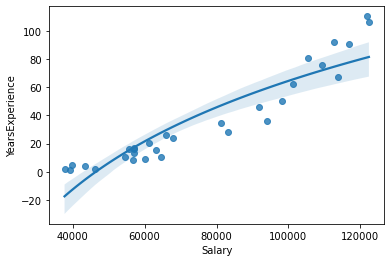

In [48]:
sns.regplot(x=y, y=np.square(x), data=data,logx=True);

In [49]:
#Coefficients
model.params

Intercept       48042.585515
np.square(x)      776.318773
dtype: float64

In [50]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept       21.973654
np.square(x)    17.397015
dtype: float64 
 Intercept       3.389190e-19
np.square(x)    1.518127e-16
dtype: float64


In [51]:
#R squared values
(model.rsquared,model.rsquared_adj)
# r square values degrade as compared to y~x

(0.9153198857852565, 0.9122955959918728)

#### Predict for original dataset

In [52]:
#Predict for the given dataset values of original dataset


In [53]:
model.predict(data)
# Predictions for input data

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64

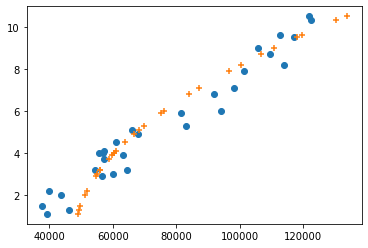

In [54]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='+')
plt.show()

### 6. for np.sq(y)~x

In [55]:
y = data.Salary
x = data.YearsExperience


In [56]:
model = smf.ols('np.square(y)~x',data = data).fit()

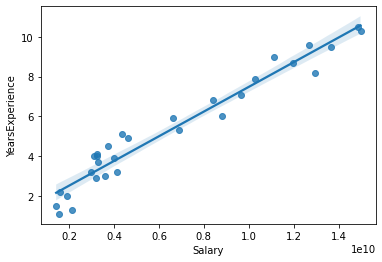

In [57]:
sns.regplot(x=np.square(y), y=x, data=data);

In [58]:
#Coefficients
model.params

Intercept   -1.609636e+09
x            1.526836e+09
dtype: float64

In [59]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept high and for less than 0.05

Intercept    -3.926574
x            22.352727
dtype: float64 
 Intercept    5.114661e-04
x            2.152535e-19
dtype: float64


In [60]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

#### Predict for original dataset

In [61]:
#Predict for the given dataset values of original dataset


In [62]:
np.sqrt(model.predict(data))
# Predictions for input data

0       8359.692806
1      19371.415770
2      26088.676357
3      38000.490088
4      41825.883518
5      53086.627601
6      54505.721467
7      57238.456983
8      57238.456983
9      63558.313151
10     65916.814666
11     67064.969234
12     67064.969234
13     68193.795472
14     72533.635723
15     76628.081546
16     78595.357157
17     80514.579125
18     86015.692215
19     86898.693602
20     93663.504580
21     96077.588531
22    102236.843450
23    104452.970691
24    108045.551963
25    110144.869271
26    113557.520401
27    114227.816587
28    118814.054641
29    120092.243152
dtype: float64

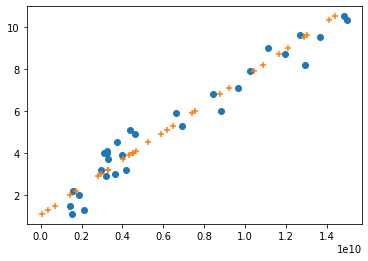

In [63]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(np.square(data.Salary),data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='+')
plt.show()

### 7. for np.sq(y)~np.sq(x)

In [64]:
y = data.Salary
x = data.YearsExperience


In [65]:
model = smf.ols('np.square(y)~np.square(x)',data = data).fit()

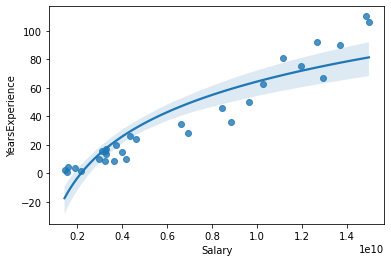

In [66]:
sns.regplot(x=np.square(y), y=np.square(x), data=data,logx=True);

In [67]:
#Coefficients
model.params

Intercept       1.866350e+09
np.square(x)    1.287350e+08
dtype: float64

In [68]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept        7.137536
np.square(x)    24.121846
dtype: float64 
 Intercept       9.113094e-08
np.square(x)    2.824566e-20
dtype: float64


In [69]:
#R squared values
(model.rsquared,model.rsquared_adj)
# r squared value goes further down

(0.9540880842110778, 0.9524483729329021)

#### Predict for original dataset

In [70]:
#Predict for the given dataset values of original dataset


In [71]:
np.sqrt(model.predict(data))
# Predictions for input data = output inconsistent

0      44967.982095
1      45649.887278
2      46432.788010
3      48798.463434
4      49894.162228
5      54304.800302
6      54999.681631
7      56432.228080
8      56432.228080
9      60238.958148
10     61841.808369
11     62658.677801
12     62658.677801
13     63485.315192
14     66882.236863
15     70407.933979
16     72213.206172
17     74044.013418
18     79671.921343
19     80627.598796
20     88425.426077
21     91410.507502
22     99502.265060
23    102579.192578
24    107751.108619
25    110877.789485
26    116123.567165
27    117177.500743
28    124594.723323
29    126725.619489
dtype: float64

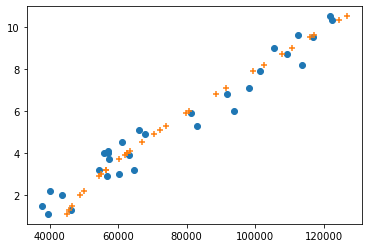

In [72]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.sqrt(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 8. for y~np.sqrt(x)

In [73]:
y = data.Salary
x = data.YearsExperience


In [74]:
model = smf.ols('y~np.sqrt(x)',data = data).fit()

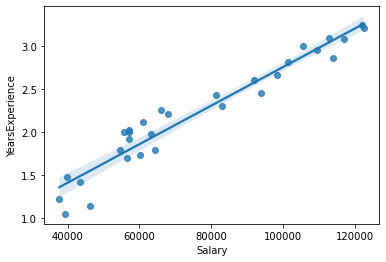

In [75]:
sns.regplot(x=y, y=np.sqrt(x), data=data);

In [76]:
#Coefficients
model.params

Intercept    -16055.769117
np.sqrt(x)    41500.680583
dtype: float64

In [77]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for intercept high and for y less than 0.05

Intercept     -3.262308
np.sqrt(x)    19.437148
dtype: float64 
 Intercept     2.906965e-03
np.sqrt(x)    8.565358e-18
dtype: float64


In [78]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

#### Predict for original dataset

In [79]:
#Predict for the given dataset values of original dataset


In [80]:
model.predict(data)
# Predictions for input data

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

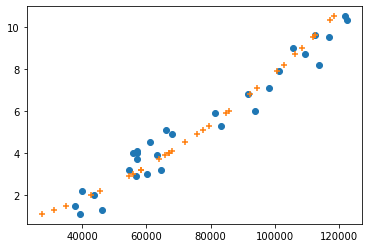

In [81]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(model.predict(data),data.YearsExperience,marker='+')
plt.show()

### 9. for np.sqrt(y)~x

In [82]:
y = data.Salary
x = data.YearsExperience


In [83]:
model = smf.ols('np.sqrt(y)~x',data = data).fit()

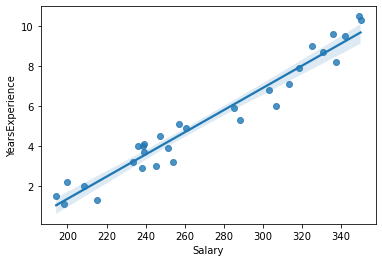

In [84]:
sns.regplot(x=np.sqrt(y), y=x, data=data);

In [85]:
#Coefficients
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [86]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    40.646251
x            23.025247
dtype: float64 
 Intercept    1.920194e-26
x            9.782891e-20
dtype: float64


In [87]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9498353533865289, 0.9480437588646192)

#### Predict for original dataset

In [88]:
#Predict for the given dataset values of original dataset


In [89]:
np.square(model.predict(data))
# Predictions for input data but output inconsistent with original data

0      39785.251671
1      41157.743455
2      42553.509262
3      46144.747630
4      47621.972517
5      52975.542551
6      53763.612294
7      55357.207295
8      55357.207295
9      59443.018648
10     61118.072729
11     61964.327528
12     61964.327528
13     62816.400833
14     66282.879110
15     69842.453478
16     71657.151696
17     73495.123938
18     79148.684798
19     80111.309712
20     88021.775225
21     91084.205136
22     99506.699152
23    102761.139752
24    108301.577533
25    111695.662270
26    117468.840280
27    118640.931399
28    127008.487392
29    129451.584227
dtype: float64

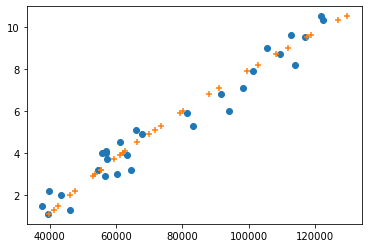

In [90]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.square(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 10. for np.sqrt(y)~np.sqrt(x)

In [91]:
y = data.Salary
x = data.YearsExperience


In [92]:
model = smf.ols('np.sqrt(y)~np.sqrt(x)',data = data).fit()

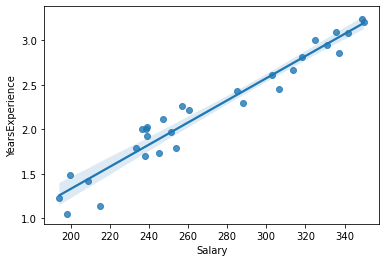

In [93]:
sns.regplot(x=np.sqrt(y), y=np.sqrt(x), data=data);

In [94]:
#Coefficients
model.params

Intercept     103.568031
np.sqrt(x)     75.626932
dtype: float64

In [95]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept     12.663496
np.sqrt(x)    21.315126
dtype: float64 
 Intercept     4.141645e-13
np.sqrt(x)    7.584326e-19
dtype: float64


In [96]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9419490138976825, 0.9398757643940283)

#### Predict for original dataset

In [97]:
#Predict for the given dataset values of original dataset


In [98]:
np.square(model.predict(data))
# Predictions for input data

0      33447.371655
1      36022.521569
2      38491.193991
3      44318.949727
4      46544.135171
5      53989.336270
6      55017.323598
7      57051.041838
8      57051.041838
9      62020.592218
10     63968.149237
11     64934.197889
12     64934.197889
13     65895.350251
14     69694.405347
15     73427.656958
16     75272.141554
17     77103.018416
18     82521.300854
19     83414.349494
20     90467.971458
21     93075.167881
22     99939.557841
23    102483.605120
24    106690.705528
25    109196.426832
26    113343.921252
27    114169.320200
28    119911.347953
29    121540.993172
dtype: float64

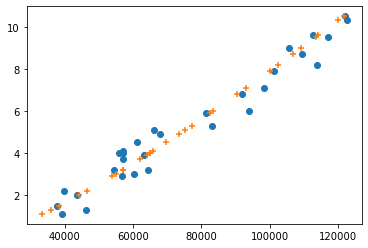

In [99]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.square(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 11. for y~np.power(x,3)

In [100]:
y = data.Salary
x = data.YearsExperience


In [101]:
model = smf.ols('y~np.power(x,3)',data = data).fit()

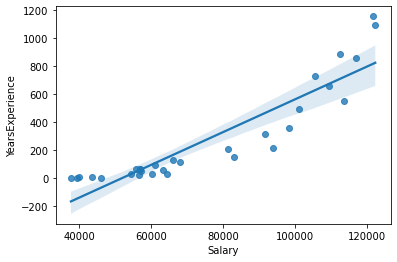

In [102]:
sns.regplot(x=y, y=np.power(x,3), data=data);

In [103]:
#Coefficients
model.params

Intercept         55911.623915
np.power(x, 3)       71.264833
dtype: float64

In [104]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept         20.887108
np.power(x, 3)    11.870804
dtype: float64 
 Intercept         1.295610e-18
np.power(x, 3)    1.922328e-12
dtype: float64


In [105]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8342371274125908, 0.8283170248201833)

#### Predict for original dataset

In [106]:
#Predict for the given dataset values of original dataset


In [107]:
model.predict(data)
# Predictions for input data

0      56006.477408
1      56068.192753
2      56152.142727
3      56481.742580
4      56670.451858
5      57649.701930
6      57835.774409
7      58246.829967
8      58246.829967
9      59521.401507
10     60138.982551
11     60472.573235
12     60472.573235
13     60823.267478
14     62405.631833
15     64295.860267
16     65364.975293
17     66521.318475
18     70547.924076
19     71304.827869
20     78319.567922
21     81418.091601
22     91047.965971
23     95204.772422
24    102839.730318
25    107863.687259
26    117012.310210
27    118962.187309
28    133784.631214
29    138409.576354
dtype: float64

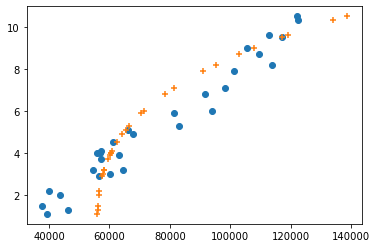

In [108]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter((model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 12. for np.power(y,3)~x

In [117]:
y = data.Salary
x = data.YearsExperience


In [118]:
model = smf.ols('np.power(y,3)~x',data = data).fit()

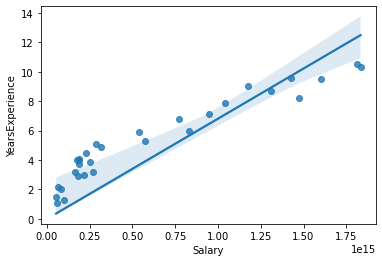

In [119]:
sns.regplot(x=np.power(y,3), y=x, data=data);

In [120]:
#Coefficients
model.params

Intercept   -4.327463e+14
x            1.964878e+14
dtype: float64

In [121]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept    -6.475932
x            17.646409
dtype: float64 
 Intercept    5.135483e-07
x            1.052473e-16
dtype: float64


In [122]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9175004408289745, 0.9145540280014379)

#### Predict for original dataset

In [123]:
#Predict for the given dataset values of original dataset


In [124]:
np.cbrt(model.predict(data))
# Predictions for input data

0     -60056.399416
1     -56179.707720
2     -51678.309464
3     -34134.028219
4      -7791.925093
5      51559.944943
6      53914.494280
7      58089.313903
8      58089.313903
9      66513.492035
10     69351.578203
11     70687.444717
12     70687.444717
13     71974.642980
14     76713.100915
15     80928.965104
16     82881.507543
17     84746.148080
18     89898.316033
19     90701.540108
20     96669.328276
21     98727.792156
22    103834.658345
23    105626.006869
24    108483.253330
25    110127.788833
26    112764.330875
27    113277.071407
28    116742.910729
29    117696.237334
dtype: float64

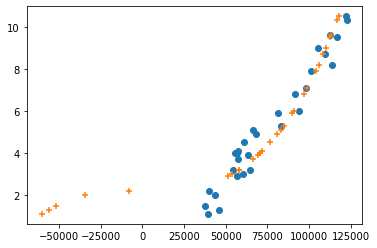

In [125]:
# Comparing original Data's scatterplot with regressed model's scatterplot
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.cbrt(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### 13. for np.power(y,3)~np.power(x,3)

In [126]:
y = data.Salary
x = data.YearsExperience


In [127]:
model = smf.ols('np.power(y,3)~np.power(x,3)',data = data).fit()

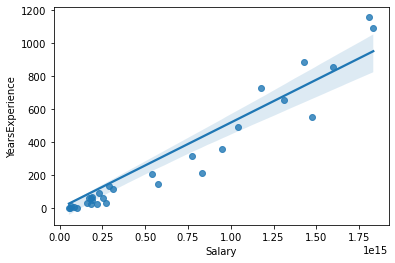

In [128]:
sns.regplot(x=np.power(y,3), y=np.power(x,3), data=data);

In [129]:
#Coefficients
model.params

Intercept         1.583456e+14
np.power(x, 3)    1.606500e+12
dtype: float64

In [130]:
#t and p-Values

print(model.tvalues, '\n', model.pvalues) 
# pvalues for both intercept and y are less than 0.05

Intercept          4.636538
np.power(x, 3)    20.974769
dtype: float64 
 Intercept         7.488319e-05
np.power(x, 3)    1.160122e-18
dtype: float64


In [131]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9401633889252157, 0.9380263671011162)

#### Predict for original dataset

In [132]:
#Predict for the given dataset values of original dataset


In [133]:
np.cbrt(model.predict(data))
# Predictions for input data

0      54343.024451
1      54499.605436
2      54711.165303
3      55526.365633
4      55982.524429
5      58238.274480
6      58647.629666
7      59532.235184
8      59532.235184
9      62120.445349
10     63300.454905
11     63919.954621
12     63919.954621
13     64558.524597
14     67293.871112
15     70294.592054
16     71884.167359
17     73527.827384
18     78745.374897
19     79652.116511
20     87218.662268
21     90177.824127
22     98318.994170
23    101449.499685
24    106742.816526
25    109958.225696
26    115372.919533
27    116463.318927
28    124155.623503
29    126370.419463
dtype: float64

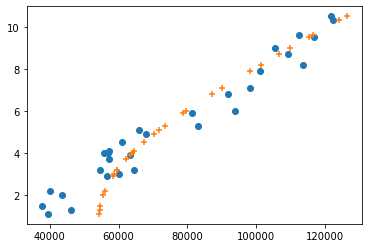

In [134]:
# Comparing original Data's scatterplot with regressed model's scatterplot 
plt.scatter(data.Salary,data.YearsExperience)
plt.scatter(np.cbrt(model.predict(data)),data.YearsExperience,marker='+')
plt.show()

### The transformation No.1 (y~x)  gives us the best r-squared value and hence can be adopted.